## Data Scraping ##

In [1]:
import requests
page= requests.get('https://www.worldometers.info/coronavirus/')

In [2]:
page.status_code

200

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 21,176,295 Cases and 759,397 Deaths from COVID-19 Virus Pandemic - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link 
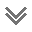

In [3]:
page.content

In [4]:
from bs4 import BeautifulSoup

In [5]:
soup = BeautifulSoup(page.content, 'lxml')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 21,176,295 Cases and 759,397 Deaths from COVID-19 Virus Pandemic - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"
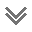

In [6]:
print(soup.prettify())#page formating

In [7]:
table = soup.find('table', attrs = {'id' : 'main_table_countries_today'})

In [8]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent="Nor

In [9]:
rows = table.find_all('tr', attrs={'style':''})

In [10]:
data =[]
for i, item in enumerate(rows):
    if i ==0:
        data.append(item.text.strip().split("\n")[1:17])
    else:
        data.append(item.text.strip().split("\n")[:16])

In [11]:
data

[['Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population'],
 ['World',
  '21,176,295',
  '+118,147',
  '759,397',
  '+2,678',
  '13,987,945',
  '+68,437',
  '6,428,953',
  '64,578',
  '2,717',
  '97.4',
  '',
  '',
  '',
  'All'],
 ['1',
  'USA',
  '5,431,381',
  '+15,715',
  '170,782 ',
  '+367',
  '2,845,496',
  '+2,292',
  '2,415,103',
  '17,220',
  '16,397',
  '516',
  '68,714,208',
  '207,448',
  '331,235,184 ',
  'North America'],
 ['2',
  'Brazil',
  '3,229,621',
  '',
  '105,564 ',
  '',
  '2,356,640',
  '',
  '767,417',
  '8,318',
  '15,181',
  '496',
  '13,464,336',
  '63,290',
  '212,739,546 ',
  'South America'],
 ['3',
  'India',
  '2,506,247',
  '+46,634',
  '48,888 ',
  '+744',
  '1,770,682',
  '+20,046',
  '686,677',
  '8,944',
  '1,814',
  '35',
  '27,694,416',
  '20,

## Data Frame ##

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

df = pd.DataFrame(data[1:], columns=data[0][:16])

In [13]:
df.head()

Country,Other  TotalCases   NewCases TotalDeaths NewDeaths TotalRecovered  \
0         World  21,176,295   +118,147     759,397    +2,678     13,987,945   
1             1         USA  5,431,381     +15,715  170,782            +367   
2             2      Brazil  3,229,621              105,564                   
3             3       India  2,506,247     +46,634   48,888            +744   
4             4      Russia    912,823      +5,065   15,498            +114   

  NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop Deaths/1M pop  \
0      +68,437   6,428,953           64,578            2,717          97.4   
1    2,845,496      +2,292        2,415,103           17,220        16,397   
2    2,356,640                      767,417            8,318        15,181   
3    1,770,682     +20,046          686,677            8,944         1,814   
4      722,964      +6,568          174,361            2,300         6,255   

  TotalTests      Tests/   1M pop                     Population  
0                                             All           None  
1        516  68,714,208  207,448    331,235,184   North America  
2        496  13,464,336   63,290    212,739,546   South America  
3         35  27,694,416   20,045  1,381,604,279            Asia  
4        106  31,903,055  218,601    145,942,116          Europe

In [14]:
df.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/', '1M pop',
       '', 'Population'],
      dtype='object')

In [15]:
df.to_csv('covid19.csv', index=False)

In [16]:
df= pd.read_csv('covid19.csv', header=None , names=['Country','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','Serious/Critical','TotCases/1M pop','Deaths/1M pop','TotalTests','Tests/1M pop','Population','Continent'], parse_dates=True)

In [17]:
df.tail()

Country TotalCases NewCases TotalDeaths   NewDeaths  \
211                 MS Zaandam          9      NaN          2          NaN   
212     British Virgin Islands          9      NaN          1          NaN   
213      Saint Pierre Miquelon          4      NaN                     NaN   
215                      China     84,786      +30      4,634          NaN   
Total:              21,176,295   +118,147  759,397      +2,678  13,987,945   

       TotalRecovered NewRecovered ActiveCases Serious/Critical  \
211               NaN          NaN           7              NaN   
212                 7          NaN           1              NaN   
213                 1          NaN           3              NaN   
215            79,462          +64         690               39   
Total:        +68,437    6,428,953      64,578          2,716.7   

       TotCases/1M pop Deaths/1M pop  TotalTests Tests/1M pop      Population  \
211                NaN           NaN         NaN          NaN             NaN   
212                297            33       1,522       50,306         30,255    
213                691           NaN         NaN          NaN          5,790    
215                 59             3  90,410,000       62,814  1,439,323,776    
Total:            97.4           NaN         NaN          NaN             All   

            Continent  
211               NaN  
212     North America  
213     North America  
215              Asia  
Total:            NaN

## Data Cleaning ##

In [18]:
df.drop(df.index[0:2], inplace=True)
df.drop(df.index[-1], inplace=True)
df.tail()

Country TotalCases NewCases TotalDeaths NewDeaths  \
210          Western Sahara         10      NaN          1        NaN   
211              MS Zaandam          9      NaN          2        NaN   
212  British Virgin Islands          9      NaN          1        NaN   
213   Saint Pierre Miquelon          4      NaN                   NaN   
215                   China     84,786      +30      4,634        NaN   

    TotalRecovered NewRecovered ActiveCases Serious/Critical TotCases/1M pop  \
210              8          NaN           1              NaN              17   
211            NaN          NaN           7              NaN             NaN   
212              7          NaN           1              NaN             297   
213              1          NaN           3              NaN             691   
215         79,462          +64         690               39              59   

    Deaths/1M pop  TotalTests Tests/1M pop      Population      Continent  
210             2         NaN          NaN        598,964          Africa  
211           NaN         NaN          NaN             NaN            NaN  
212            33       1,522       50,306         30,255   North America  
213           NaN         NaN          NaN          5,790   North America  
215             3  90,410,000       62,814  1,439,323,776            Asia

In [19]:
df.head()

Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
1           USA  5,431,381  +15,715    170,782       +367      2,845,496   
2        Brazil  3,229,621      NaN    105,564        NaN      2,356,640   
3         India  2,506,247  +46,634     48,888       +744      1,770,682   
4        Russia    912,823   +5,065     15,498       +114        722,964   
5  South Africa    572,865      NaN     11,270        NaN        437,617   

  NewRecovered ActiveCases Serious/Critical TotCases/1M pop Deaths/1M pop  \
1       +2,292   2,415,103           17,220          16,397           516   
2          NaN     767,417            8,318          15,181           496   
3      +20,046     686,677            8,944           1,814            35   
4       +6,568     174,361            2,300           6,255           106   
5          NaN     123,978              539           9,645           190   

   TotalTests Tests/1M pop      Population      Continent  
1  68,714,208      207,448    331,235,184   North America  
2  13,464,336       63,290    212,739,546   South America  
3  27,694,416       20,045  1,381,604,279            Asia  
4  31,903,055      218,601    145,942,116          Europe  
5   3,315,497       55,820     59,395,867          Africa

In [21]:
#cols = ['TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','Serious/Critical','TotCases/1M pop','Deaths/1M pop','TotalTests','Tests/1M pop','Population']
#df[cols] = df[cols].replace({',' : '' , '+' :''}, regex=True)
#df[cols] = df[cols].str.replace(',', '')
str_cols = df.select_dtypes(['object']).columns
df[str_cols] = df[str_cols].replace(',', '', regex=True)
#df[str_cols] = df[str_cols].replace('+','', regex=True)
#df[str_cols] = df[str_cols].replace(r'\D', '')


#data['str_cols'] = data['str_cols'].map(lambda x: x.lstrip('+-'))

In [22]:
df['Population'].isnull()

1      False
2      False
3      False
4      False
5      False
       ...  
210    False
211     True
212    False
213    False
215    False
Name: Population, Length: 202, dtype: bool

In [23]:
df.dropna(subset=['Population','TotalRecovered','Tests/1M pop'], inplace=True)

In [24]:
df.head()

Country TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
1           USA    5431381   +15715     170782       +367        2845496   
2        Brazil    3229621      NaN     105564        NaN        2356640   
3         India    2506247   +46634      48888       +744        1770682   
4        Russia     912823    +5065      15498       +114         722964   
5  South Africa     572865      NaN      11270        NaN         437617   

  NewRecovered ActiveCases Serious/Critical TotCases/1M pop Deaths/1M pop  \
1        +2292     2415103            17220           16397           516   
2          NaN      767417             8318           15181           496   
3       +20046      686677             8944            1814            35   
4        +6568      174361             2300            6255           106   
5          NaN      123978              539            9645           190   

  TotalTests Tests/1M pop   Population      Continent  
1   68714208       207448   331235184   North America  
2   13464336        63290   212739546   South America  
3   27694416        20045  1381604279            Asia  
4   31903055       218601   145942116          Europe  
5    3315497        55820    59395867          Africa

In [25]:
df.isnull().sum()

Country               0
TotalCases            0
NewCases             89
TotalDeaths           0
NewDeaths           128
TotalRecovered        0
NewRecovered        105
ActiveCases           0
Serious/Critical     60
TotCases/1M pop       0
Deaths/1M pop        13
TotalTests            0
Tests/1M pop          0
Population            0
Continent             0
dtype: int64

In [26]:
df.fillna(0, inplace=True)

In [27]:

df.isnull().sum()

Country             0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious/Critical    0
TotCases/1M pop     0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
Population          0
Continent           0
dtype: int64

In [28]:
df.tail()

Country TotalCases NewCases TotalDeaths NewDeaths  \
201                    Laos         22       +2                     0   
206   Caribbean Netherlands         13        0                     0   
208               St. Barth         13        0                     0   
212  British Virgin Islands          9        0          1          0   
215                   China      84786      +30       4634          0   

    TotalRecovered NewRecovered ActiveCases Serious/Critical TotCases/1M pop  \
201             19            0           3                0               3   
206              7            0           6                0             495   
208              8            0           5                0            1316   
212              7            0           1                0             297   
215          79462          +64         690               39              59   

    Deaths/1M pop TotalTests Tests/1M pop   Population      Continent  
201             0      33001         4528     7287770            Asia  
206             0        424        16151       26252   North America  
208             0       1612       163141        9881   North America  
212            33       1522        50306       30255   North America  
215             3   90410000        62814  1439323776            Asia

In [29]:
df = df.astype({'TotalCases':int,'NewCases': int, 'NewDeaths': int, 'TotalRecovered': int,'NewRecovered': int, 'ActiveCases': int, 'Serious/Critical': int, 'TotCases/1M pop': float, 'Deaths/1M pop': float, 'TotalTests': int, 'Tests/1M pop': float, 'Population':int}) 

In [30]:
df['TotalDeaths'] = df['TotalDeaths'].replace(' ', 0).astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 1 to 215
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           179 non-null    object 
 1   TotalCases        179 non-null    int64  
 2   NewCases          179 non-null    int64  
 3   TotalDeaths       179 non-null    int64  
 4   NewDeaths         179 non-null    int64  
 5   TotalRecovered    179 non-null    int64  
 6   NewRecovered      179 non-null    int64  
 7   ActiveCases       179 non-null    int64  
 8   Serious/Critical  179 non-null    int64  
 9   TotCases/1M pop   179 non-null    float64
 10  Deaths/1M pop     179 non-null    float64
 11  TotalTests        179 non-null    int64  
 12  Tests/1M pop      179 non-null    float64
 13  Population        179 non-null    int64  
 14  Continent         179 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 22.4+ KB


In [32]:
df.to_csv('covid19.csv', index=False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 1 to 215
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           179 non-null    object 
 1   TotalCases        179 non-null    int64  
 2   NewCases          179 non-null    int64  
 3   TotalDeaths       179 non-null    int64  
 4   NewDeaths         179 non-null    int64  
 5   TotalRecovered    179 non-null    int64  
 6   NewRecovered      179 non-null    int64  
 7   ActiveCases       179 non-null    int64  
 8   Serious/Critical  179 non-null    int64  
 9   TotCases/1M pop   179 non-null    float64
 10  Deaths/1M pop     179 non-null    float64
 11  TotalTests        179 non-null    int64  
 12  Tests/1M pop      179 non-null    float64
 13  Population        179 non-null    int64  
 14  Continent         179 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 22.4+ KB


In [45]:
df.sort_values(by='TotalCases', ascending=False, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'rest_index'

In [46]:
df.reset_index(drop=True)

Country  TotalCases  NewCases  TotalDeaths  NewDeaths  \
0                       USA     5431381     15715       170782        367   
1                    Brazil     3229621         0       105564          0   
2                     India     2506247     46634        48888        744   
3                    Russia      912823      5065        15498        114   
4              South Africa      572865         0        11270          0   
..                      ...         ...       ...          ...        ...   
174           New Caledonia          23         0            0          0   
175                    Laos          22         2            0          0   
176   Caribbean Netherlands          13         0            0          0   
177               St. Barth          13         0            0          0   
178  British Virgin Islands           9         0            1          0   

     TotalRecovered  NewRecovered  ActiveCases  Serious/Critical  \
0           2845496          2292      2415103             17220   
1           2356640             0       767417              8318   
2           1770682         20046       686677              8944   
3            722964          6568       174361              2300   
4            437617             0       123978               539   
..              ...           ...          ...               ...   
174              22             0            1                 0   
175              19             0            3                 0   
176               7             0            6                 0   
177               8             0            5                 0   
178               7             0            1                 0   

     TotCases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop  Population  \
0            16397.0          516.0    68714208      207448.0   331235184   
1            15181.0          496.0    13464336       63290.0   212739546   
2             1814.0           35.0    27694416       20045.0  1381604279   
3             6255.0          106.0    31903055      218601.0   145942116   
4             9645.0          190.0     3315497       55820.0    59395867   
..               ...            ...         ...           ...         ...   
174             80.0            0.0       11265       39413.0      285822   
175              3.0            0.0       33001        4528.0     7287770   
176            495.0            0.0         424       16151.0       26252   
177           1316.0            0.0        1612      163141.0        9881   
178            297.0           33.0        1522       50306.0       30255   

             Continent  
0        North America  
1        South America  
2                 Asia  
3               Europe  
4               Africa  
..                 ...  
174  Australia/Oceania  
175               Asia  
176      North America  
177      North America  
178      North America  

[179 rows x 15 columns]

In [37]:
import matplotlib.pyplot as plt

In [42]:
df.plt()